### Importing all the required packages and dependencies

In [5]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

### Readind the data 

In [6]:
data = pd.read_csv("../Loan Prediction Problem/train.csv")

In [7]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Checking for NA values

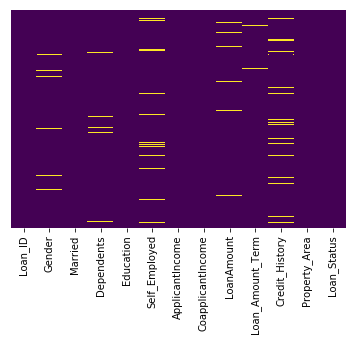

In [9]:
sns.heatmap(data=data.isna(), yticklabels=False, cbar=False, cmap='viridis')

As we can observe in the above figure, there are missing values in the data.
Now let's count the NA values for each feature

In [10]:
for i in data.columns:
    print("{} == {}".format(i, data[i].isnull().sum()))    

Loan_ID == 0
Gender == 13
Married == 3
Dependents == 15
Education == 0
Self_Employed == 32
ApplicantIncome == 0
CoapplicantIncome == 0
LoanAmount == 22
Loan_Amount_Term == 14
Credit_History == 50
Property_Area == 0
Loan_Status == 0


#### Checking labels of the predictors with missing values

In [11]:
missing_predictors = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']

In [12]:
for i in missing_predictors:
    print("{} == {}".format(i, set(data[i]))) 

Gender == {'Male', nan, 'Female'}
Married == {nan, 'Yes', 'No'}
Dependents == {nan, '1', '0', '2', '3+'}
Self_Employed == {nan, 'Yes', 'No'}
Loan_Amount_Term == {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 12.0, 36.0, 300.0, 180.0, 60.0, 84.0, 480.0, 360.0, 240.0, 120.0}


#### *Assumptions:*

- *Gender: If not spcified, then 'Male'*
- *Married: If not spcified, then 'No'*
- *Dependents: If not spcified, then '0'*
- *Self_Employed: If not spcified, then 'No'*
- *Loan_Ampount_Term: If not spcified, then mean of all the values in this column*
- *Credit_History: If not spcified, then '1'*
- *Loan_Amount: If not spcified, then mean of all the values in this column*

#### Data preprocessing to deal with missing values 

Initailly, dividing the data in train and test sets

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','ApplicantIncome', 'Loan_Amount_Term',
                'CoapplicantIncome','LoanAmount','Credit_History', 'Property_Area']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[predictor_var], data['Loan_Status'], 
                                                                    test_size=0.25, random_state=42)

In [16]:
X_train.shape

(460, 11)

In [17]:
X_train['Gender'] = X_train['Gender'].fillna('Male')
X_train['Married'] = X_train['Married'].fillna('No')
X_train['Dependents'] = X_train['Dependents'].fillna('0')
X_train['Self_Employed'] = X_train['Self_Employed'].fillna('0')
X_train['Loan_Amount_Term'] = X_train['Loan_Amount_Term'].fillna(X_train['Loan_Amount_Term'].mean())
X_train['Credit_History'] = X_train['Credit_History'].fillna('1')
X_train['LoanAmount'] = X_train['LoanAmount'].fillna(X_train['LoanAmount'].mean())

In [18]:
#sns.heatmap(data=X_train.isna(), yticklabels=False, cbar=False, cmap='viridis')

Converting string label values to numeric

In [19]:
label_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']

for i in label_columns:
    print("{}:{}".format(i, set(X_train[i])))

Gender:{'Male', 'Female'}
Married:{'Yes', 'No'}
Education:{'Graduate', 'Not Graduate'}
Self_Employed:{'Yes', '0', 'No'}
Property_Area:{'Rural', 'Urban', 'Semiurban'}
Dependents:{'1', '2', '3+', '0'}


In [20]:
gender_val = {'Female': 0, 'Male': 1}
married_val = {'No':0, 'Yes':1}
dependant_val = {'2':2, '3+':3, '1':1, '0':0}
self_emp_val = {'No':0, 'Yes':1}
education_val = {'Graduate':1, 'Not Graduate':0}
property_area_val = {'Semiurban':2, 'Urban':1, 'Rural':0}

In [21]:
X_train.replace({'Gender':gender_val,
                'Married': married_val,
                'Dependents':dependant_val,
                'Self_Employed':self_emp_val,
                'Education':education_val,
                'Property_Area':property_area_val}, inplace = True)

In [22]:
X_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed         object
ApplicantIncome        int64
Loan_Amount_Term     float64
CoapplicantIncome    float64
LoanAmount           float64
Credit_History        object
Property_Area          int64
dtype: object

In [23]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,Loan_Amount_Term,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
92,1,1,2,0,0,3273,360.0,1820.0,81.0,1,1
304,1,0,0,1,0,4000,360.0,2500.0,140.0,1,0
68,1,1,3,0,1,7100,60.0,0.0,125.0,1,1
15,1,0,0,1,0,4950,360.0,0.0,125.0,1,1
211,1,1,3,1,0,3430,360.0,1250.0,128.0,0,2


In [24]:
#sns.heatmap(data=X_train.isna(), yticklabels=False, cbar=False, cmap='viridis')

In [25]:
X_train = X_train.as_matrix()

In [26]:
print(X_train)
print('\n')
print(X_train.shape)

[[1 1 2 ... 81.0 1.0 1]
 [1 0 0 ... 140.0 1.0 0]
 [1 1 3 ... 125.0 1.0 1]
 ...
 [0 0 0 ... 30.0 1.0 1]
 [0 0 0 ... 147.21846846846847 1.0 2]
 [1 1 0 ... 147.21846846846847 1.0 1]]


(460, 11)


We will create a custom preprocessor as discussed earlier in this notebook so that it will help us in building better pipeline and future (as API) deployments

In [27]:
from sklearn.base import BaseEstimator, TransformerMixin

class PreProcessor(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        pass
    
    def transform(self, df):
        
        predictor_var = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','ApplicantIncome', 'Loan_Amount_Term',
                'CoapplicantIncome','LoanAmount','Credit_History', 'Property_Area']
        df = df[predictor_var]
        df['Gender'] = df['Gender'].fillna('Male')
        df['Married'] = df['Married'].fillna('No')
        df['Dependents'] = df['Dependents'].fillna('0')
        df['Self_Employed'] = df['Self_Employed'].fillna('0')
        df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(self.term_mean)
        df['Credit_History'] = df['Credit_History'].fillna('1')
        df['LoanAmount'] = df['LoanAmount'].fillna(self.amt_mean)
        
        gender_val = {'Female': 0, 'Male': 1}
        married_val = {'No':0, 'Yes':1}
        dependant_val = {'2':2, '3+':3, '1':1, '0':0}
        self_emp_val = {'No':0, 'Yes':1}
        education_val = {'Graduate':1, 'Not Graduate':0}
        property_area_val = {'Semiurban':2, 'Urban':1, 'Rural':0}
        
        df.replace({'Gender':gender_val,
                'Married': married_val,
                'Dependents':dependant_val,
                'Self_Employed':self_emp_val,
                'Education':education_val,
                'Property_Area':property_area_val}, inplace = True)
        
        #print(df.as_matrix())
        return df.as_matrix()
    
    def fit(self, df, y=None, **fit_params):
        
        self.term_mean = df['Loan_Amount_Term'].mean()
        self.amt_mean = df['LoanAmount'].mean()
        #print(self.term_mean, self.amt_mean)
        return self
        

Let's check if this preprocessor works for our use case (it should because we already did all the steps before to clean th data impute values)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data[predictor_var], data['Loan_Status'], 
                                                                    test_size=0.25, random_state=42)

In [29]:
preprocess = PreProcessor()

In [30]:
preprocess.fit(X_train)

PreProcessor()

In [31]:
X_train_transformed = preprocess.transform(X_train)

In [32]:
X_train_transformed.shape

(460, 11)

In [33]:
X_test_transformed = preprocess.transform(X_test)

In [34]:
X_test_transformed.shape

(154, 11)

In [35]:
y_test = y_test.replace({'Y':1, 'N':0}).as_matrix()
y_train = y_train.replace({'Y':1, 'N':0}).as_matrix()

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [45]:
param_grid = {"randomforestclassifier__n_estimators" : [10, 20, 30],
             "randomforestclassifier__max_depth" : [None, 6, 8, 10],
             "randomforestclassifier__max_leaf_nodes": [None, 5, 10, 20], 
             "randomforestclassifier__min_impurity_decrease": [0.1, 0.2, 0.3]}

In [46]:
pipe = make_pipeline(PreProcessor(), 
                     RandomForestClassifier())

In [47]:
pipe

Pipeline(memory=None,
     steps=[('preprocessor', PreProcessor()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=3)

In [50]:
grid

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', PreProcessor()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': [10, 20, 30], 'randomforestclassifier__max_depth': [None, 6, 8, 10], 'randomforestclassifier__max_leaf_nodes': [None, 5, 10, 20], 'randomforestclassifier__min_impurity_decrease': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('preprocessor', PreProcessor()), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impuri..._jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'randomforestclassifier__n_estimators': [10, 20, 30], 'randomforestclassifier__max_depth': [None, 6, 8, 10], 'randomforestclassifier__max_leaf_nodes': [None, 5, 10, 20], 'randomforestclassifier__min_impurity_decrease': [0.1, 0.2, 0.3]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
grid.best_params_

{'randomforestclassifier__max_depth': 8,
 'randomforestclassifier__max_leaf_nodes': 10,
 'randomforestclassifier__min_impurity_decrease': 0.1,
 'randomforestclassifier__n_estimators': 20}

In [53]:
print("The grid score is: {:.3f}".format(grid.score(X_test, y_test)))

The grid score is: 0.773


Now loading the test data set

In [54]:
test_data = pd.read_csv("../Loan Prediction Problem/test.csv")

In [55]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
pred_val = grid.predict(test_data)

In [57]:
pred_val[:20]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Observing above output, our model is ready with a score of 77% 

### Serialization Deserialization of the model

Using Python standard pickle approch to serialize the model so that if can easy for it to use in another environment i.e. wherever the model is depolyed. In this case **Flask**

    Importing required packages to serialize the model

In [58]:
import dill as pickle

In [59]:
filename = 'loan_pred_prob_model_v1.pk'

In [60]:
with open ('../Loan Prediction Problem/'+filename, 'wb') as file:
    pickle.dump(grid, file)

Now that the model is pickled and will be saved in the given location. The next step is to create a flask wrapper around the pickled model.

Before creating the wrapper, let's check if our pickled model can be deserialzed and can be used to predict loan status; Loan Status.

In [61]:
with open('../Loan Prediction Problem/'+filename, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = list(loaded_model.predict(test_data))

In [62]:
predictions[:10]

[1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

As we can see in the above cell, the model works perfectly after deserialization.

Creating a server file which acts like a flask wrapper to the model name as server.py. You can find it in the master on github. It contains a method called *apicall()* in which it takes test data as json a file and sent to the deserliazed model to predict loan status and then dispayed as a data frame with their respective loan Ids. (with http response codes off course!!)

Let's check if the deployed model on flask works or not

In [63]:
import json
import requests

In [64]:
# setting the accept and request responses
header = {'Content-Type' : 'application/json',
         'Accept': 'application/json'}

#Reading the test data and converting it into json

test = test_data.to_json(orient='records')

In [69]:
test[:500]

'[{"Loan_ID":"LP001015","Gender":"Male","Married":"Yes","Dependents":"0","Education":"Graduate","Self_Employed":"No","ApplicantIncome":5720,"CoapplicantIncome":0,"LoanAmount":110.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Urban"},{"Loan_ID":"LP001022","Gender":"Male","Married":"Yes","Dependents":"1","Education":"Graduate","Self_Employed":"No","ApplicantIncome":3076,"CoapplicantIncome":1500,"LoanAmount":126.0,"Loan_Amount_Term":360.0,"Credit_History":1.0,"Property_Area":"Urba'

In [ ]:
response = requests.post(url='https://0.0.0.0:8000/predict', 
                         data=json.dumps(test), 
                         headers = header)

After running the above cell you calling the model deployed/hosted on the url and predicted values will be generated as shown below 

{'predictions': '[{"0":"LP001015","1":1},{...

### Concluding Remarks: 

Deploying the model using flask and using through an API on a virual python environment gave a solution to this Loan prediction problem and it can be used by differernt teams to predict loan status. Off course the model needs to be retrained and scaled depending on data changes and amount the data fetched to the model.